In [6]:
pwd

'C:\\Users\\Lenovo\\yolov5'

# Installing Requirements and dependencies for the pre trained YOLOV5 Model 

In [16]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


# Cloning github repository for yolo model

In [13]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [5]:
cd yolov5

C:\Users\Lenovo\yolov5


In [14]:
!cd yolov5 & pip install -r requirements.txt

# Importing the required libraries such as matplot , numpy to get the output as an image , open cv2 for detection

In [4]:
import torch 
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [5]:
model=torch.hub.load('ultralytics/yolov5','yolov5n')

Using cache found in C:\Users\Lenovo/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-10-7 Python-3.10.9 torch-2.1.0+cu118 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients, 4.5 GFLOPs
Adding AutoShape... 


In [6]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 16, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1))
  

# Live video code for detecting person,objects

In [12]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [15]:
import uuid
import os
import time

In [14]:
Images_Path=os.path.join('Data3','images')
labels=['Awake','Sleepy']
number_imgs=20

# Code for collecting images to train the model

In [15]:
cap=cv2.VideoCapture(0)
for label in labels:
    print("Collecting images for {}".format(labels))
    time.sleep(5)
    
    for img_num in range(number_imgs):
        print("Collecting images for {} , image number {}".format(label,img_num))
        
        ret,frame = cap.read()
        
        imgname=os.path.join(Images_Path,label+'.'+str(uuid.uuid1())+'.jpg')
        cv2.imwrite(imgname,frame)
        cv2.imshow('Image Collection',frame)
        time.sleep(2)
        
        if cv2.waitKey(10)& 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

# Using  labelImg maker to label images respectively

In [17]:
!git clone https://github.com/HumanSignal/labelImg

Cloning into 'labelImg'...


In [18]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

# Code to run 500 epochs for detection of Awake,Sleepy 

In [20]:
!python train.py... --img 320 --batch 8 --epoch 500 --data dataset.yml --weights yolov5n.pt

python: can't open file 'C:\\Users\\Lenovo\\train.py': [Errno 2] No such file or directory


train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
fatal: cannot change to 'C:\Users\Lavanya': No such file or directory
YOLOv5  2023-10-7 Python-3.11.4 torch-2.1.0+cu121 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, mosaic=1.0, mixup=0.0, copy_paste=0.0
Comet: run 'pip install comet_ml' to automatically track and visualize YOLOv5  runs in Comet
TensorBoard: Start with 'tensorboard --logdir runs\train', view at http://localhost:6006/
Downloading https://github.com/ultralytics/yolov5/releases/download/v7.0/yolov5s.pt to yolov5s.pt...

  0%|          | 0.00/14.1M [00:00<?, ?B/s]
  3%|3         | 488k/14.1M [00:00<00:03, 4.70MB/s]
 10%|#         | 1.42M/14.1M [00:00<00:01, 7.65MB/s]
 18%|#8        | 2.55M/14.1M [00:00<00:01, 9.48MB/s]
 25%|##5       | 3.59M/14.1M [00:00<00:01, 10.0MB/s]
 33%|###3      | 4.73M/14.1M [00:00<00:00, 10.7MB/s]
 41%|####      | 5.79M/14.1M [00:00<00:00, 10.8MB/s]
 48%|####8     | 6.84M/14.1M [00:00<00:00, 10.8MB/s]
 56%|#####5    | 7.87M/14.1M [00:00<00:00, 10.4MB/s]
 63%|######3   | 8.90M/14.1M [00:00<00:00, 10.5MB/s]
 70%|#######   | 9.91M/14.1M [00:01<00:00, 10.1MB/s]
 77%|#######7  | 10.9M/14.1M [00:01<00:00, 10.1MB/s]
 84%|########3 | 11.9M/14.1M [00:01<00:00, 10.1MB/s]
 91%|#########1| 12.9M/14.1M [00:01<00:00, 10.2MB/s]
 98%|#########8| 13.9M/14.1M [00:01<00:00, 10.2MB/s]
100%|##########| 14.1M/14.1M [00:01<00:00, 10.0MB/s]

Overriding model.yaml nc=80 with nc=17

                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Conv                      [3, 32, 6, 2, 2]              
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     18816  models.common.C3                        [64, 64, 1]                   
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  2    115712  models.common.C3                        [128, 128, 2]                 
  5                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]              
  6                -1  3    625152  models.common.C3                        [256, 256, 3]                 
  7                -1  1   1180672  models.common.Conv                      [256, 512, 3, 2]              
  8                -1  1   1182720  models.common.C3                        [512, 512, 1]                 
  9                -1  1    656896  models.common.SPPF                      [512, 512, 5]                 
 10                -1  1    131584  models.common.Conv                      [512, 256, 1, 1]              
 11                -1  1         0  torch.nn.modules.upsampling.Upsample    [None, 2, 'nearest']          
 12           [-1, 6]  1         0  models.common.Concat                    [1]                           
 13                -1  1    361984  models.common.C3                        [512, 256, 1, False]          
 14                -1  1     33024  models.common.Conv                      [256, 128, 1, 1]              
 15                -1  1         0  torch.nn.modules.upsampling.Upsample    [None, 2, 'nearest']          
 16           [-1, 4]  1         0  models.common.Concat                    [1]                           
 17                -1  1     90880  models.common.C3                        [256, 128, 1, False]          
 18                -1  1    147712  models.common.Conv                      [128, 128, 3, 2]              
 19          [-1, 14]  1         0  models.common.Concat                    [1]                           
 20                -1  1    296448  models.common.C3                        [256, 256, 1, False]          
 21                -1  1    590336  models.common.Conv                      [256, 256, 3, 2]              
 22          [-1, 10]  1         0  models.common.Concat                    [1]                           
 23                -1  1   1182720  models.common.C3                        [512, 512, 1, False]          
 24      [17, 20, 23]  1     59334  models.yolo.Detect                      [17, [[10, 13, 16, 30, 33, 23], [30, 61, 62, 45, 59, 119], [116, 90, 156, 198, 373, 326]], [128, 256, 512]]
Model summary: 214 layers, 7065478 parameters, 7065478 gradients, 16.1 GFLOPs

Transferred 343/349 items from yolov5s.pt
optimizer: SGD(lr=0.01) with parameter groups 57 weight(decay=0.0), 60 weight(decay=0.0005), 60 bias

train: Scanning C:\Users\Lavanya\data_final\labels...:   0%|          | 0/100 [00:00<?, ?it/s]
train: Scanning C:\Users\Lavanya\data_final\labels... 1 images, 0 backgrounds, 0 corrupt:   1%|1         | 1/100 [00:08<14:43,  8.92s/it]
train: Scanning C:\Users\Lavanya\data_final\labels... 45 images, 0 backgrounds, 0 corrupt:  45%|####5     | 45/100 [00:09<00:07,  7.04it/s]
train: Scanning C:\Users\Lavanya\data_final\labels... 100 images, 0 backgrounds, 0 corrupt: 100%|##########| 100/100 [00:09<00:00, 11.01it/s]
train: New cache created: C:\Users\Lavanya\data_final\labels.cache

val: Scanning C:\Users\Lavanya\data_final\labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|##########| 100/100 [00:00<?, ?it/s]
val: Scanning C:\Users\Lavanya\data_final\labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|##########| 100/100 [00:00<?, ?it/s]

AutoAnchor: 5.29 anchors/target, 1.000 Best Possible Recall (BPR). Current anchors are a good fit to dataset 
Plotting labels to runs\train\exp2\labels.jpg... 
Image sizes 320 train, 320 val
Using 8 dataloader workers
Logging results to runs\train\exp2
Starting training for 500 epochs...

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/7 [00:00<?, ?it/s]
      0/499         0G     0.1137    0.01554     0.0773         39        320:   0%|          | 0/7 [00:03<?, ?it/s]
      0/499         0G     0.1137    0.01554     0.0773         39        320:  14%|#4        | 1/7 [00:03<00:19,  3.23s/it]
      0/499         0G     0.1122    0.01491    0.07831         31        320:  14%|#4        | 1/7 [00:05<00:19,  3.23s/it]
      0/499         0G     0.1122    0.01491    0.07831         31        320:  29%|##8       | 2/7 [00:05<00:12,  2.57s/it]
      0/499         0G     0.1125    0.01427    0.07783         31        320:  29%|##8       | 2/7 [00:07<00:12,  2.57s/it]
      0/499         0G     0.1125    0.01427    0.07783         31        320:  43%|####2     | 3/7 [00:07<00:08,  2.21s/it]
      0/499         0G     0.1125    0.01419    0.07727         33        320:  43%|####2     | 3/7 [00:08<00:08,  2.21s/it]
      0/499         0G     0.1125    0.01419    0.07727         33        320:  57%|#####7    | 4/7 [00:08<00:06,  2.02s/it]
      0/499         0G     0.1117    0.01445    0.07717         37        320:  57%|#####7    | 4/7 [00:10<00:06,  2.02s/it]
      0/499         0G     0.1117    0.01445    0.07717         37        320:  71%|#######1  | 5/7 [00:10<00:03,  1.84s/it]
      0/499         0G     0.1109    0.01531    0.07721         42        320:  71%|#######1  | 5/7 [00:11<00:03,  1.84s/it]
      0/499         0G     0.1109    0.01531    0.07721         42        320:  86%|########5 | 6/7 [00:11<00:01,  1.75s/it]
      0/499         0G     0.1109     0.0152    0.07745          9        320:  86%|########5 | 6/7 [00:12<00:01,  1.75s/it]
      0/499         0G     0.1109     0.0152    0.07745          9        320: 100%|##########| 7/7 [00:12<00:00,  1.35s/it]
      0/499         0G     0.1109     0.0152    0.07745          9        320: 100%|##########| 7/7 [00:12<00:00,  1.78s/it]

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|          | 0/4 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  25%|##5       | 1/4 [00:01<00:03,  1.33s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  50%|#####     | 2/4 [00:02<00:02,  1.30s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  75%|#######5  | 3/4 [00:03<00:01,  1.21s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 4/4 [00:03<00:00,  1.25it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 4/4 [00:03<00:00,  1.03it/s]
                   all        100        100    0.00469      0.212    0.00295   0.000409

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/7 [00:00<?, ?it/s]
      1/499         0G      0.101    0.01773    0.07386         35        320:   0%|          | 0/7 [00:01<?, ?it/s]
      1/499         0G      0.101    0.01773    0.07386         35        320:  14%|#4        | 1/7 [00:01<00:10,  1.71s/it]
      1/499         0G      0.101     0.0171    0.07324         34        320:  14%|#4        | 1/7 [00:03<00:10,  1.71s/it]
      1/499         0G      0.101     0.0171    0.07324         34        320:  29%|##8       | 2/7 [00:03<00:08,  1.62s/it]
      1/499         0G    0.09908    0.01821    0.07286         39        320:  29%|##8       | 2/7 [00:04<00:08,  1.62s/it]
      1/499         0G    0.09908    0.01821    0.07286         39        320:  43%|####2     | 3/7 [00:04<00:06,  1.61s/it]
      1/499         0G    0.09584    0.01854    0.07316         35        320:  43%|####2     | 3/7 [00:06<00:06,  1.61s/it]
      1/499         0G    0.09584    0.01854    0.07316         35        320:  57%|#####7    | 4/7 [00:06<00:04,  1.64s/it]
      1/499         0G     0.0931    0.01855      0.073         32        320:  57%|#####7    | 4/7 [00:08<00:04,  1.64s/it]
      1/499         0G     0.0931    0.01855      0.073         32        320:  71%|#######1  | 5/7 [00:08<00:03,  1.66s/it]
      1/499         0G    0.09116     0.0188    0.07284         33        320:  71%|#######1  | 5/7 [00:09<00:03,  1.66s/it]
      1/499         0G    0.09116     0.0188    0.07284         33        320:  86%|########5 | 6/7 [00:09<00:01,  1.62s/it]
      1/499         0G    0.09107    0.01913     0.0714          8        320:  86%|########5 | 6/7 [00:10<00:01,  1.62s/it]
      1/499         0G    0.09107    0.01913     0.0714          8        320: 100%|##########| 7/7 [00:10<00:00,  1.26s/it]
      1/499         0G    0.09107    0.01913     0.0714          8        320: 100%|##########| 7/7 [00:10<00:00,  1.47s/it]

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|          | 0/4 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  25%|##5       | 1/4 [00:01<00:03,  1.17s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  50%|#####     | 2/4 [00:02<00:02,  1.21s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  75%|#######5  | 3/4 [00:03<00:01,  1.18s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 4/4 [00:03<00:00,  1.29it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 4/4 [00:03<00:00,  1.08it/s]
                   all        100        100     0.0091      0.457     0.0069     0.0017

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/7 [00:00<?, ?it/s]
      2/499         0G    0.08546    0.02107    0.06945         35        320:   0%|          | 0/7 [00:01<?, ?it/s]
      2/499         0G    0.08546    0.02107    0.06945         35        320:  14%|#4        | 1/7 [00:01<00:09,  1.66s/it]
      2/499         0G     0.0837    0.02056    0.06737         34        320:  14%|#4        | 1/7 [00:03<00:09,  1.66s/it]
      2/499         0G     0.0837    0.02056    0.06737         34        320:  29%|##8       | 2/7 [00:03<00:08,  1.69s/it]
      2/499         0G    0.08269    0.02056    0.06583         33        320:  29%|##8       | 2/7 [00:04<00:08,  1.69s/it]
      2/499         0G    0.08269    0.02056    0.06583         33        320:  43%|####2     | 3/7 [00:04<00:06,  1.64s/it]
      2/499         0G    0.08152    0.02066    0.06535         34        320:  43%|####2     | 3/7 [00:06<00:06,  1.64s/it]
      2/499         0G    0.08152    0.02066    0.06535         34        320:  57%|#####7    | 4/7 [00:06<00:04,  1.63s/it]
      2/499         0G    0.08323     0.0201    0.06504         29        320:  57%|#####7    | 4/7 [00:08<00:04,  1.63s/it]
      2/499         0G    0.08323     0.0201    0.06504         29        320:  71%|#######1  | 5/7 [00:08<00:03,  1.63s/it]
      2/499         0G     0.0828    0.02138    0.06457         45        320:  71%|#######1  | 5/7 [00:09<00:03,  1.63s/it]
      2/499         0G     0.0828    0.02138    0.06457         45        320:  86%|########5 | 6/7 [00:09<00:01,  1.62s/it]
      2/499         0G    0.08119    0.02179      0.064          8        320:  86%|########5 | 6/7 [00:10<00:01,  1.62s/it]
      2/499         0G    0.08119    0.02179      0.064          8        320: 100%|##########| 7/7 [00:10<00:00,  1.25s/it]
      2/499         0G    0.08119    0.02179      0.064          8        320: 100%|##########| 7/7 [00:10<00:00,  1.47s/it]

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|          | 0/4 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  25%|##5       | 1/4 [00:01<00:03,  1.24s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  50%|#####     | 2/4 [00:02<00:02,  1.20s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  75%|#######5  | 3/4 [00:03<00:01,  1.23s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 4/4 [00:03<00:00,  1.24it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 4/4 [00:03<00:00,  1.04it/s]
                   all        100        100    0.00892      0.582     0.0214    0.00449

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/7 [00:00<?, ?it/s]
      3/499         0G    0.06935    0.02139     0.0579         32        320:   0%|          | 0/7 [00:01<?, ?it/s]
      3/499         0G    0.06935    0.02139     0.0579         32        320:  14%|#4        | 1/7 [00:01<00:09,  1.58s/it]
      3/499         0G    0.07408    0.02408    0.05917         43        320:  14%|#4        | 1/7 [00:03<00:09,  1.58s/it]
      3/499         0G    0.07408    0.02408    0.05917         43        320:  29%|##8       | 2/7 [00:03<00:08,  1.64s/it]
      3/499         0G    0.07221    0.02471     0.0584         37        320:  29%|##8       | 2/7 [00:04<00:08,  1.64s/it]
      3/499         0G    0.07221    0.02471     0.0584         37        320:  43%|####2     | 3/7 [00:04<00:06,  1.61s/it]
      3/499         0G    0.07131    0.02451    0.05804         37        320:  43%|####2     | 3/7 [00:06<00:06,  1.61s/it]
      3/499         0G    0.07131    0.02451    0.05804         37        320:  57%|#####7    | 4/7 [00:06<00:04,  1.59s/it]
      3/499         0G     0.0698    0.02429    0.05696         32        320:  57%|#####7    | 4/7 [00:07<00:04,  1.59s/it]
      3/499         0G     0.0698    0.02429    0.05696         32        320:  71%|#######1  | 5/7 [00:07<00:03,  1.58s/it]
      3/499         0G    0.06944    0.02429    0.05629         34        320:  71%|#######1  | 5/7 [00:09<00:03,  1.58s/it]
      3/499         0G    0.06944    0.02429    0.05629         34        320:  86%|########5 | 6/7 [00:09<00:01,  1.61s/it]
      3/499         0G    0.06618    0.02334    0.05361          7        320:  86%|########5 | 6/7 [00:10<00:01,  1.61s/it]
      3/499         0G    0.06618    0.02334    0.05361          7        320: 100%|##########| 7/7 [00:10<00:00,  1.23s/it]
      3/499         0G    0.06618    0.02334    0.05361          7        320: 100%|##########| 7/7 [00:10<00:00,  1.44s/it]

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|          | 0/4 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  25%|##5       | 1/4 [00:01<00:03,  1.30s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  50%|#####     | 2/4 [00:02<00:02,  1.22s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  75%|#######5  | 3/4 [00:03<00:01,  1.24s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 4/4 [00:03<00:00,  1.24it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 4/4 [00:03<00:00,  1.03it/s]
                   all        100        100     0.0118          1     0.0365     0.0152

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/7 [00:00<?, ?it/s]
      4/499         0G    0.06439    0.02192    0.04961         34        320:   0%|          | 0/7 [00:01<?, ?it/s]
      4/499         0G    0.06439    0.02192    0.04961         34        320:  14%|#4        | 1/7 [00:01<00:09,  1.56s/it]
      4/499         0G    0.06669    0.02689    0.05059         45        320:  14%|#4        | 1/7 [00:03<00:09,  1.56s/it]
      4/499         0G    0.06669    0.02689    0.05059         45        320:  29%|##8       | 2/7 [00:03<00:07,  1.56s/it]
      4/499         0G    0.06527    0.02723    0.05008         41        320:  29%|##8       | 2/7 [00:04<00:07,  1.56s/it]
      4/499         0G    0.06527    0.02723    0.05008         41        320:  43%|####2     | 3/7 [00:04<00:06,  1.62s/it]
      4/499         0G    0.06552    0.02728    0.04943         41        320:  43%|####2     | 3/7 [00:06<00:06,  1.62s/it]
      4/499         0G    0.06552    0.02728    0.04943         41        320:  57%|#####7    | 4/7 [00:06<00:04,  1.59s/it]
      4/499         0G    0.06484    0.02642    0.04864         34        320:  57%|#####7    | 4/7 [00:07<00:04,  1.59s/it]
      4/499         0G    0.06484    0.02642    0.04864         34        320:  71%|#######1  | 5/7 [00:07<00:03,  1.57s/it]
      4/499         0G    0.06365    0.02627    0.04783         39        320:  71%|#######1  | 5/7 [00:09<00:03,  1.57s/it]
      4/499         0G    0.06365    0.02627    0.04783         39        320:  86%|########5 | 6/7 [00:09<00:01,  1.57s/it]
      4/499         0G    0.06201     0.0246    0.04671          5        320:  86%|########5 | 6/7 [00:09<00:01,  1.57s/it]
      4/499         0G    0.06201     0.0246    0.04671          5        320: 100%|##########| 7/7 [00:09<00:00,  1.22s/it]
      4/499         0G    0.06201     0.0246    0.04671          5        320: 100%|##########| 7/7 [00:09<00:00,  1.42s/it]

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|          | 0/4 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  25%|##5       | 1/4 [00:01<00:04,  1.42s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  50%|#####     | 2/4 [00:02<00:02,  1.34s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  75%|#######5  | 3/4 [00:03<00:01,  1.26s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 4/4 [00:04<00:00,  1.22it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 4/4 [00:04<00:00,  1.00s/it]
                   all        100        100      0.419      0.609      0.448      0.145

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/7 [00:00<?, ?it/s]
      5/499         0G    0.05728    0.02558    0.04197         39        320:   0%|          | 0/7 [00:01<?, ?it/s]
      5/499         0G    0.05728    0.02558    0.04197         39        320:  14%|#4        | 1/7 [00:01<00:09,  1.50s/it]
      5/499         0G    0.05735    0.02516    0.04225         40        320:  14%|#4        | 1/7 [00:03<00:09,  1.50s/it]
      5/499         0G    0.05735    0.02516    0.04225         40        320:  29%|##8       | 2/7 [00:03<00:07,  1.53s/it]
      5/499         0G    0.05958    0.02379     0.0426         36        320:  29%|##8       | 2/7 [00:04<00:07,  1.53s/it]
      5/499         0G    0.05958    0.02379     0.0426         36        320:  43%|####2     | 3/7 [00:04<00:06,  1.56s/it]
      5/499         0G    0.06129    0.02309    0.04272         38        320:  43%|####2     | 3/7 [00:06<00:06,  1.56s/it]
      5/499         0G    0.06129    0.02309    0.04272         38        320:  57%|#####7    | 4/7 [00:06<00:04,  1.62s/it]
      5/499         0G    0.06036    0.02264    0.04192         36        320:  57%|#####7    | 4/7 [00:08<00:04,  1.62s/it]
      5/499         0G    0.06036    0.02264    0.04192         36        320:  71%|#######1  | 5/7 [00:08<00:03,  1.67s/it]
      5/499         0G    0.06065    0.02313    0.04146         46        320:  71%|#######1  | 5/7 [00:09<00:03,  1.67s/it]
      5/499         0G    0.06065    0.02313    0.04146         46        320:  86%|########5 | 6/7 [00:09<00:01,  1.74s/it]
      5/499         0G    0.06041    0.02219    0.04202          7        320:  86%|########5 | 6/7 [00:10<00:01,  1.74s/it]
      5/499         0G    0.06041    0.02219    0.04202          7        320: 100%|##########| 7/7 [00:10<00:00,  1.33s/it]
      5/499         0G    0.06041    0.02219    0.04202          7        320: 100%|##########| 7/7 [00:10<00:00,  1.50s/it]

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|          | 0/4 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  25%|##5       | 1/4 [00:01<00:04,  1.64s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  50%|#####     | 2/4 [00:03<00:03,  1.64s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  75%|#######5  | 3/4 [00:04<00:01,  1.58s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 4/4 [00:04<00:00,  1.03s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 4/4 [00:04<00:00,  1.24s/it]
                   all        100        100     0.0911      0.549      0.108      0.034

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/7 [00:00<?, ?it/s]
      6/499         0G    0.06397    0.01936    0.03449         34        320:   0%|          | 0/7 [00:01<?, ?it/s]
      6/499         0G    0.06397    0.01936    0.03449         34        320:  14%|#4        | 1/7 [00:01<00:10,  1.81s/it]
      6/499         0G    0.06121    0.01782    0.03641         29        320:  14%|#4        | 1/7 [00:03<00:10,  1.81s/it]
      6/499         0G    0.06121    0.01782    0.03641         29        320:  29%|##8       | 2/7 [00:03<00:08,  1.78s/it]
      6/499         0G    0.06042    0.01706    0.03765         28        320:  29%|##8       | 2/7 [00:05<00:08,  1.78s/it]
      6/499         0G    0.06042    0.01706    0.03765         28        320:  43%|####2     | 3/7 [00:05<00:07,  1.79s/it]
      6/499         0G    0.06045    0.01772    0.03708         38        320:  43%|####2     | 3/7 [00:07<00:07,  1.79s/it]
      6/499         0G    0.06045    0.01772    0.03708         38        320:  57%|#####7    | 4/7 [00:07<00:05,  1.79s/it]
      6/499         0G    0.06079    0.01899    0.03769         44        320:  57%|#####7    | 4/7 [00:08<00:05,  1.79s/it]
      6/499         0G    0.06079    0.01899    0.03769         44        320:  71%|#######1  | 5/7 [00:08<00:03,  1.79s/it]
      6/499         0G    0.06085     0.0184    0.03704         31        320:  71%|#######1  | 5/7 [00:10<00:03,  1.79s/it]
      6/499         0G    0.06085     0.0184    0.03704         31        320:  86%|########5 | 6/7 [00:10<00:01,  1.78s/it]
      6/499         0G    0.06117    0.01864     0.0365         11        320:  86%|########5 | 6/7 [00:11<00:01,  1.78s/it]
      6/499         0G    0.06117    0.01864     0.0365         11        320: 100%|##########| 7/7 [00:11<00:00,  1.37s/it]
      6/499         0G    0.06117    0.01864     0.0365         11        320: 100%|##########| 7/7 [00:11<00:00,  1.61s/it]

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|          | 0/4 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  25%|##5       | 1/4 [00:01<00:04,  1.57s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  50%|#####     | 2/4 [00:03<00:03,  1.59s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  75%|#######5  | 3/4 [00:04<00:01,  1.57s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 4/4 [00:04<00:00,  1.03s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 4/4 [00:04<00:00,  1.23s/it]
                   all        100        100      0.109      0.882      0.155     0.0486

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/7 [00:00<?, ?it/s]
      7/499         0G    0.06374    0.01633    0.03229         33        320:   0%|          | 0/7 [00:01<?, ?it/s]
      7/499         0G    0.06374    0.01633    0.03229         33        320:  14%|#4        | 1/7 [00:01<00:10,  1.77s/it]
      7/499         0G    0.06259    0.01795    0.03379         37        320:  14%|#4        | 1/7 [00:03<00:10,  1.77s/it]
      7/499         0G    0.06259    0.01795    0.03379         37        320:  29%|##8       | 2/7 [00:03<00:09,  1.96s/it]
      7/499         0G    0.06212    0.01764    0.03367         33        320:  29%|##8       | 2/7 [00:05<00:09,  1.96s/it]
      7/499         0G    0.06212    0.01764    0.03367         33        320:  43%|####2     | 3/7 [00:05<00:07,  1.91s/it]
      7/499         0G    0.06329    0.01783    0.03378         41        320:  43%|####2     | 3/7 [00:07<00:07,  1.91s/it]
      7/499         0G    0.06329    0.01783    0.03378         41        320:  57%|#####7    | 4/7 [00:07<00:05,  1.89s/it]
      7/499         0G    0.06334    0.01777    0.03375         36        320:  57%|#####7    | 4/7 [00:09<00:05,  1.89s/it]
      7/499         0G    0.06334    0.01777    0.03375         36        320:  71%|#######1  | 5/7 [00:09<00:03,  1.89s/it]
      7/499         0G    0.06277    0.01768    0.03398         37        320:  71%|#######1  | 5/7 [00:11<00:03,  1.89s/it]
      7/499         0G    0.06277    0.01768    0.03398         37        320:  86%|########5 | 6/7 [00:11<00:01,  1.77s/it]
      7/499         0G    0.06199    0.01821    0.03415         12        320:  86%|########5 | 6/7 [00:11<00:01,  1.77s/it]
      7/499         0G    0.06199    0.01821    0.03415         12        320: 100%|##########| 7/7 [00:11<00:00,  1.35s/it]
      7/499         0G    0.06199    0.01821    0.03415         12        320: 100%|##########| 7/7 [00:11<00:00,  1.64s/it]

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|          | 0/4 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  25%|##5       | 1/4 [00:01<00:04,  1.36s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  50%|#####     | 2/4 [00:02<00:02,  1.40s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  75%|#######5  | 3/4 [00:04<00:01,  1.42s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 4/4 [00:04<00:00,  1.09it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 4/4 [00:04<00:00,  1.09s/it]
                   all        100        100      0.302      0.769      0.334     0.0802

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/7 [00:00<?, ?it/s]
      8/499         0G    0.05696    0.02048    0.03172         43        320:   0%|          | 0/7 [00:01<?, ?it/s]
      8/499         0G    0.05696    0.02048    0.03172         43        320:  14%|#4        | 1/7 [00:01<00:09,  1.64s/it]
      8/499         0G    0.05798    0.01805    0.03316         33        320:  14%|#4        | 1/7 [00:03<00:09,  1.64s/it]
      8/499         0G    0.05798    0.01805    0.03316         33        320:  29%|##8       | 2/7 [00:03<00:08,  1.62s/it]
      8/499         0G     0.0579    0.01661     0.0327         28        320:  29%|##8       | 2/7 [00:04<00:08,  1.62s/it]
      8/499         0G     0.0579    0.01661     0.0327         28        320:  43%|####2     | 3/7 [00:04<00:06,  1.65s/it]
      8/499         0G    0.05881    0.01626    0.03369         30        320:  43%|####2     | 3/7 [00:06<00:06,  1.65s/it]
      8/499         0G    0.05881    0.01626    0.03369         30        320:  57%|#####7    | 4/7 [00:06<00:05,  1.72s/it]
      8/499         0G    0.05884    0.01582    0.03341         32        320:  57%|#####7    | 4/7 [00:08<00:05,  1.72s/it]
      8/499         0G    0.05884    0.01582    0.03341         32        320:  71%|#######1  | 5/7 [00:08<00:03,  1.74s/it]
      8/499         0G     0.0598    0.01625    0.03364         44        320:  71%|#######1  | 5/7 [00:10<00:03,  1.74s/it]
      8/499         0G     0.0598    0.01625    0.03364         44        320:  86%|########5 | 6/7 [00:10<00:01,  1.74s/it]
      8/499         0G    0.06078    0.01774    0.03283         14        320:  86%|########5 | 6/7 [00:10<00:01,  1.74s/it]
      8/499         0G    0.06078    0.01774    0.03283         14        320: 100%|##########| 7/7 [00:10<00:00,  1.33s/it]
      8/499         0G    0.06078    0.01774    0.03283         14        320: 100%|##########| 7/7 [00:10<00:00,  1.54s/it]

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|          | 0/4 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  25%|##5       | 1/4 [00:01<00:04,  1.45s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  50%|#####     | 2/4 [00:02<00:02,  1.45s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  75%|#######5  | 3/4 [00:04<00:01,  1.39s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 4/4 [00:04<00:00,  1.09it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 4/4 [00:04<00:00,  1.10s/it]
                   all        100        100      0.247      0.678      0.252     0.0666

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/7 [00:00<?, ?it/s]
      9/499         0G    0.07271    0.01584    0.03459         38        320:   0%|          | 0/7 [00:01<?, ?it/s]
      9/499         0G    0.07271    0.01584    0.03459         38        320:  14%|#4        | 1/7 [00:01<00:10,  1.75s/it]
      9/499         0G    0.07286    0.01553    0.03493         34        320:  14%|#4        | 1/7 [00:03<00:10,  1.75s/it]
      9/499         0G    0.07286    0.01553    0.03493         34        320:  29%|##8       | 2/7 [00:03<00:09,  1.81s/it]
      9/499         0G    0.07348    0.01592    0.03384         39        320:  29%|##8       | 2/7 [00:05<00:09,  1.81s/it]
      9/499         0G    0.07348    0.01592    0.03384         39        320:  43%|####2     | 3/7 [00:05<00:07,  1.82s/it]
      9/499         0G    0.07161    0.01579    0.03474         32        320:  43%|####2     | 3/7 [00:07<00:07,  1.82s/it]
      9/499         0G    0.07161    0.01579    0.03474         32        320:  57%|#####7    | 4/7 [00:07<00:05,  1.82s/it]
      9/499         0G    0.06912    0.01591     0.0347         37        320:  57%|#####7    | 4/7 [00:09<00:05,  1.82s/it]
      9/499         0G    0.06912    0.01591     0.0347         37        320:  71%|#######1  | 5/7 [00:09<00:03,  1.81s/it]
      9/499         0G    0.06713    0.01577    0.03404         30        320:  71%|#######1  | 5/7 [00:10<00:03,  1.81s/it]
      9/499         0G    0.06713    0.01577    0.03404         30        320:  86%|########5 | 6/7 [00:10<00:01,  1.82s/it]
      9/499         0G    0.06988    0.01531    0.03417          9        320:  86%|########5 | 6/7 [00:11<00:01,  1.82s/it]
      9/499         0G    0.06988    0.01531    0.03417          9        320: 100%|##########| 7/7 [00:11<00:00,  1.38s/it]
      9/499         0G    0.06988    0.01531    0.03417          9        320: 100%|##########| 7/7 [00:11<00:00,  1.62s/it]

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|          | 0/4 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  25%|##5       | 1/4 [00:01<00:04,  1.62s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  50%|#####     | 2/4 [00:03<00:03,  1.61s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  75%|#######5  | 3/4 [00:04<00:01,  1.61s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 4/4 [00:05<00:00,  1.05s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 4/4 [00:05<00:00,  1.26s/it]
                   all        100        100     0.0775      0.297     0.0689     0.0204

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/7 [00:00<?, ?it/s]
     10/499         0G    0.07328    0.01479    0.03416         35        320:   0%|          | 0/7 [00:01<?, ?it/s]
     10/499         0G    0.07328    0.01479    0.03416         35        320:  14%|#4        | 1/7 [00:01<00:10,  1.81s/it]
     10/499         0G    0.07083    0.01711    0.03395         46        320:  14%|#4        | 1/7 [00:03<00:10,  1.81s/it]
     10/499         0G    0.07083    0.01711    0.03395         46        320:  29%|##8       | 2/7 [00:03<00:09,  1.81s/it]
     10/499         0G    0.06547    0.01768    0.03357         41        320:  29%|##8       | 2/7 [00:05<00:09,  1.81s/it]
     10/499         0G    0.06547    0.01768    0.03357         41        320:  43%|####2     | 3/7 [00:05<00:07,  1.77s/it]
     10/499         0G    0.06144    0.01736    0.03317         30        320:  43%|####2     | 3/7 [00:07<00:07,  1.77s/it]
     10/499         0G    0.06144    0.01736    0.03317         30        320:  57%|#####7    | 4/7 [00:07<00:05,  1.74s/it]
     10/499         0G    0.05893    0.01703    0.03305         30        320:  57%|#####7    | 4/7 [00:08<00:05,  1.74s/it]
     10/499         0G    0.05893    0.01703    0.03305         30        320:  71%|#######1  | 5/7 [00:08<00:03,  1.74s/it]
     10/499         0G    0.05919    0.01712    0.03275         40        320:  71%|#######1  | 5/7 [00:10<00:03,  1.74s/it]
     10/499         0G    0.05919    0.01712    0.03275         40        320:  86%|########5 | 6/7 [00:10<00:01,  1.73s/it]
     10/499         0G    0.06089    0.01645    0.03221          9        320:  86%|########5 | 6/7 [00:10<00:01,  1.73s/it]
     10/499         0G    0.06089    0.01645    0.03221          9        320: 100%|##########| 7/7 [00:10<00:00,  1.32s/it]
     10/499         0G    0.06089    0.01645    0.03221          9        320: 100%|##########| 7/7 [00:10<00:00,  1.57s/it]

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|          | 0/4 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  25%|##5       | 1/4 [00:01<00:04,  1.46s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  50%|#####     | 2/4 [00:02<00:02,  1.44s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  75%|#######5  | 3/4 [00:04<00:01,  1.39s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 4/4 [00:04<00:00,  1.10it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 4/4 [00:04<00:00,  1.10s/it]
                   all        100        100       0.49      0.787      0.557      0.252

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/7 [00:00<?, ?it/s]
     11/499         0G    0.06163    0.01472    0.03261         32        320:   0%|          | 0/7 [00:01<?, ?it/s]
     11/499         0G    0.06163    0.01472    0.03261         32        320:  14%|#4        | 1/7 [00:01<00:10,  1.73s/it]
     11/499         0G    0.06576    0.01407    0.03295         30        320:  14%|#4        | 1/7 [00:03<00:10,  1.73s/it]
     11/499         0G    0.06576    0.01407    0.03295         30        320:  29%|##8       | 2/7 [00:03<00:08,  1.71s/it]
     11/499         0G     0.0653    0.01405    0.03287         30        320:  29%|##8       | 2/7 [00:05<00:08,  1.71s/it]
     11/499         0G     0.0653    0.01405    0.03287         30        320:  43%|####2     | 3/7 [00:05<00:06,  1.71s/it]
     11/499         0G    0.06526    0.01467    0.03255         40        320:  43%|####2     | 3/7 [00:06<00:06,  1.71s/it]
     11/499         0G    0.06526    0.01467    0.03255         40        320:  57%|#####7    | 4/7 [00:06<00:05,  1.73s/it]
     11/499         0G    0.06863     0.0142    0.03239         35        320:  57%|#####7    | 4/7 [00:08<00:05,  1.73s/it]
     11/499         0G    0.06863     0.0142    0.03239         35        320:  71%|#######1  | 5/7 [00:08<00:03,  1.74s/it]
     11/499         0G    0.07086    0.01419    0.03226         38        320:  71%|#######1  | 5/7 [00:10<00:03,  1.74s/it]
     11/499         0G    0.07086    0.01419    0.03226         38        320:  86%|########5 | 6/7 [00:10<00:01,  1.75s/it]
     11/499         0G    0.07266    0.01405    0.03213          9        320:  86%|########5 | 6/7 [00:10<00:01,  1.75s/it]
     11/499         0G    0.07266    0.01405    0.03213          9        320: 100%|##########| 7/7 [00:10<00:00,  1.34s/it]
     11/499         0G    0.07266    0.01405    0.03213          9        320: 100%|##########| 7/7 [00:10<00:00,  1.56s/it]

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|          | 0/4 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  25%|##5       | 1/4 [00:01<00:03,  1.30s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  50%|#####     | 2/4 [00:02<00:02,  1.29s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  75%|#######5  | 3/4 [00:03<00:01,  1.28s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 4/4 [00:04<00:00,  1.20it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 4/4 [00:04<00:00,  1.00s/it]
                   all        100        100      0.255       0.95      0.309     0.0996

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/7 [00:00<?, ?it/s]
     12/499         0G    0.06802    0.01563    0.03172         36        320:   0%|          | 0/7 [00:01<?, ?it/s]
     12/499         0G    0.06802    0.01563    0.03172         36        320:  14%|#4        | 1/7 [00:01<00:10,  1.74s/it]
     12/499         0G     0.0703    0.01448    0.03176         33        320:  14%|#4        | 1/7 [00:03<00:10,  1.74s/it]
     12/499         0G     0.0703    0.01448    0.03176         33        320:  29%|##8       | 2/7 [00:03<00:08,  1.61s/it]
     12/499         0G    0.07208    0.01506    0.03224         41        320:  29%|##8       | 2/7 [00:04<00:08,  1.61s/it]
     12/499         0G    0.07208    0.01506    0.03224         41        320:  43%|####2     | 3/7 [00:04<00:06,  1.58s/it]
     12/499         0G    0.06898    0.01477    0.03263         31        320:  43%|####2     | 3/7 [00:06<00:06,  1.58s/it]
     12/499         0G    0.06898    0.01477    0.03263         31        320:  57%|#####7    | 4/7 [00:06<00:04,  1.58s/it]
     12/499         0G    0.07122    0.01457    0.03251         37        320:  57%|#####7    | 4/7 [00:07<00:04,  1.58s/it]
     12/499         0G    0.07122    0.01457    0.03251         37        320:  71%|#######1  | 5/7 [00:07<00:03,  1.54s/it]
     12/499         0G    0.07342    0.01416    0.03249         32        320:  71%|#######1  | 5/7 [00:09<00:03,  1.54s/it]
     12/499         0G    0.07342    0.01416    0.03249         32        320:  86%|########5 | 6/7 [00:09<00:01,  1.53s/it]
     12/499         0G    0.07162    0.01333    0.03098          6        320:  86%|########5 | 6/7 [00:09<00:01,  1.53s/it]
     12/499         0G    0.07162    0.01333    0.03098          6        320: 100%|##########| 7/7 [00:09<00:00,  1.18s/it]
     12/499         0G    0.07162    0.01333    0.03098          6        320: 100%|##########| 7/7 [00:09<00:00,  1.40s/it]

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|          | 0/4 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  25%|##5       | 1/4 [00:01<00:04,  1.46s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  50%|#####     | 2/4 [00:03<00:03,  1.54s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  75%|#######5  | 3/4 [00:04<00:01,  1.51s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 4/4 [00:04<00:00,  1.01it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 4/4 [00:04<00:00,  1.18s/it]
                   all        100        100      0.113      0.703      0.187      0.069

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/7 [00:00<?, ?it/s]
     13/499         0G       0.08    0.01284    0.03314         35        320:   0%|          | 0/7 [00:01<?, ?it/s]
     13/499         0G       0.08    0.01284    0.03314         35        320:  14%|#4        | 1/7 [00:01<00:11,  1.86s/it]
     13/499         0G    0.07644    0.01411    0.03253         39        320:  14%|#4        | 1/7 [00:03<00:11,  1.86s/it]
     13/499         0G    0.07644    0.01411    0.03253         39        320:  29%|##8       | 2/7 [00:03<00:09,  1.83s/it]
     13/499         0G    0.07524     0.0147    0.03297         39        320:  29%|##8       | 2/7 [00:05<00:09,  1.83s/it]
     13/499         0G    0.07524     0.0147    0.03297         39        320:  43%|####2     | 3/7 [00:05<00:07,  1.83s/it]
     13/499         0G    0.07363    0.01408    0.03283         29        320:  43%|####2     | 3/7 [00:07<00:07,  1.83s/it]
     13/499         0G    0.07363    0.01408    0.03283         29        320:  57%|#####7    | 4/7 [00:07<00:05,  1.84s/it]
     13/499         0G    0.07355    0.01424    0.03281         36        320:  57%|#####7    | 4/7 [00:09<00:05,  1.84s/it]
     13/499         0G    0.07355    0.01424    0.03281         36        320:  71%|#######1  | 5/7 [00:09<00:03,  1.85s/it]
     13/499         0G    0.07294    0.01459    0.03274         41        320:  71%|#######1  | 5/7 [00:11<00:03,  1.85s/it]
     13/499         0G    0.07294    0.01459    0.03274         41        320:  86%|########5 | 6/7 [00:11<00:01,  1.84s/it]
     13/499         0G    0.07258    0.01589    0.03281         14        320:  86%|########5 | 6/7 [00:11<00:01,  1.84s/it]
     13/499         0G    0.07258    0.01589    0.03281         14        320: 100%|##########| 7/7 [00:11<00:00,  1.40s/it]
     13/499         0G    0.07258    0.01589    0.03281         14        320: 100%|##########| 7/7 [00:11<00:00,  1.65s/it]

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|          | 0/4 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  25%|##5       | 1/4 [00:01<00:04,  1.62s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  50%|#####     | 2/4 [00:03<00:03,  1.57s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  75%|#######5  | 3/4 [00:04<00:01,  1.55s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 4/4 [00:04<00:00,  1.02s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 4/4 [00:04<00:00,  1.22s/it]
                   all        100        100      0.439      0.923      0.523      0.207

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/7 [00:00<?, ?it/s]
     14/499         0G     0.0718    0.01806    0.03354         44        320:   0%|          | 0/7 [00:01<?, ?it/s]
     14/499         0G     0.0718    0.01806    0.03354         44        320:  14%|#4        | 1/7 [00:01<00:11,  1.90s/it]
     14/499         0G    0.07163    0.01756    0.03333         45        320:  14%|#4        | 1/7 [00:03<00:11,  1.90s/it]
     14/499         0G    0.07163    0.01756    0.03333         45        320:  29%|##8       | 2/7 [00:03<00:09,  1.89s/it]
     14/499         0G    0.07395    0.01715    0.03331         43        320:  29%|##8       | 2/7 [00:05<00:09,  1.89s/it]
     14/499         0G    0.07395    0.01715    0.03331         43        320:  43%|####2     | 3/7 [00:05<00:07,  1.86s/it]
     14/499         0G    0.07584    0.01626    0.03308         34        320:  43%|####2     | 3/7 [00:07<00:07,  1.86s/it]
     14/499         0G    0.07584    0.01626    0.03308         34        320:  57%|#####7    | 4/7 [00:07<00:05,  1.87s/it]
     14/499         0G     0.0763    0.01652    0.03308         46        320:  57%|#####7    | 4/7 [00:09<00:05,  1.87s/it]
     14/499         0G     0.0763    0.01652    0.03308         46        320:  71%|#######1  | 5/7 [00:09<00:03,  1.86s/it]
     14/499         0G    0.07618    0.01635    0.03302         40        320:  71%|#######1  | 5/7 [00:11<00:03,  1.86s/it]
     14/499         0G    0.07618    0.01635    0.03302         40        320:  86%|########5 | 6/7 [00:11<00:01,  1.90s/it]
     14/499         0G    0.07466     0.0166    0.03322         10        320:  86%|########5 | 6/7 [00:11<00:01,  1.90s/it]
     14/499         0G    0.07466     0.0166    0.03322         10        320: 100%|##########| 7/7 [00:11<00:00,  1.45s/it]
     14/499         0G    0.07466     0.0166    0.03322         10        320: 100%|##########| 7/7 [00:11<00:00,  1.69s/it]

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|          | 0/4 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  25%|##5       | 1/4 [00:01<00:04,  1.46s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  50%|#####     | 2/4 [00:02<00:02,  1.41s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  75%|#######5  | 3/4 [00:04<00:01,  1.38s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 4/4 [00:04<00:00,  1.10it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 4/4 [00:04<00:00,  1.09s/it]
                   all        100        100      0.505      0.971      0.586      0.426

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/7 [00:00<?, ?it/s]
     15/499         0G     0.0631    0.01943    0.03259         47        320:   0%|          | 0/7 [00:01<?, ?it/s]
     15/499         0G     0.0631    0.01943    0.03259         47        320:  14%|#4        | 1/7 [00:01<00:10,  1.80s/it]
     15/499         0G    0.06227    0.01765    0.03265         37        320:  14%|#4        | 1/7 [00:03<00:10,  1.80s/it]
     15/499         0G    0.06227    0.01765    0.03265         37        320:  29%|##8       | 2/7 [00:03<00:09,  1.82s/it]
     15/499         0G    0.06179    0.01797    0.03263         43        320:  29%|##8       | 2/7 [00:05<00:09,  1.82s/it]
     15/499         0G    0.06179    0.01797    0.03263         43        320:  43%|####2     | 3/7 [00:05<00:07,  1.83s/it]
     15/499         0G    0.06411    0.01668    0.03235         31        320:  43%|####2     | 3/7 [00:07<00:07,  1.83s/it]
     15/499         0G    0.06411    0.01668    0.03235         31        320:  57%|#####7    | 4/7 [00:07<00:05,  1.79s/it]
     15/499         0G    0.06554    0.01651    0.03217         43        320:  57%|#####7    | 4/7 [00:09<00:05,  1.79s/it]
     15/499         0G    0.06554    0.01651    0.03217         43        320:  71%|#######1  | 5/7 [00:09<00:03,  1.79s/it]
     15/499         0G    0.06757    0.01617     0.0321         40        320:  71%|#######1  | 5/7 [00:10<00:03,  1.79s/it]
     15/499         0G    0.06757    0.01617     0.0321         40        320:  86%|########5 | 6/7 [00:10<00:01,  1.80s/it]
     15/499         0G    0.06866    0.01593    0.03191         10        320:  86%|########5 | 6/7 [00:11<00:01,  1.80s/it]
     15/499         0G    0.06866    0.01593    0.03191         10        320: 100%|##########| 7/7 [00:11<00:00,  1.39s/it]
     15/499         0G    0.06866    0.01593    0.03191         10        320: 100%|##########| 7/7 [00:11<00:00,  1.63s/it]

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|          | 0/4 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  25%|##5       | 1/4 [00:01<00:03,  1.33s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  50%|#####     | 2/4 [00:02<00:02,  1.22s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  75%|#######5  | 3/4 [00:03<00:01,  1.19s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 4/4 [00:03<00:00,  1.27it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 4/4 [00:03<00:00,  1.05it/s]
                   all        100        100       0.15      0.865      0.185     0.0903

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/7 [00:00<?, ?it/s]
     16/499         0G    0.07207    0.01241    0.03117         33        320:   0%|          | 0/7 [00:01<?, ?it/s]
     16/499         0G    0.07207    0.01241    0.03117         33        320:  14%|#4        | 1/7 [00:01<00:08,  1.49s/it]
     16/499         0G    0.07397    0.01404    0.03147         43        320:  14%|#4        | 1/7 [00:03<00:08,  1.49s/it]
     16/499         0G    0.07397    0.01404    0.03147         43        320:  29%|##8       | 2/7 [00:03<00:08,  1.65s/it]
     16/499         0G    0.07122    0.01344    0.03163         31        320:  29%|##8       | 2/7 [00:04<00:08,  1.65s/it]
     16/499         0G    0.07122    0.01344    0.03163         31        320:  43%|####2     | 3/7 [00:04<00:06,  1.69s/it]
     16/499         0G    0.07121    0.01321    0.03172         32        320:  43%|####2     | 3/7 [00:06<00:06,  1.69s/it]
     16/499         0G    0.07121    0.01321    0.03172         32        320:  57%|#####7    | 4/7 [00:06<00:05,  1.74s/it]
     16/499         0G    0.07028    0.01338    0.03152         36        320:  57%|#####7    | 4/7 [00:08<00:05,  1.74s/it]
     16/499         0G    0.07028    0.01338    0.03152         36        320:  71%|#######1  | 5/7 [00:08<00:03,  1.74s/it]
     16/499         0G    0.06937    0.01399    0.03174         43        320:  71%|#######1  | 5/7 [00:10<00:03,  1.74s/it]
     16/499         0G    0.06937    0.01399    0.03174         43        320:  86%|########5 | 6/7 [00:10<00:01,  1.76s/it]
     16/499         0G     0.0686    0.01454    0.03125         11        320:  86%|########5 | 6/7 [00:10<00:01,  1.76s/it]
     16/499         0G     0.0686    0.01454    0.03125         11        320: 100%|##########| 7/7 [00:10<00:00,  1.35s/it]
     16/499         0G     0.0686    0.01454    0.03125         11        320: 100%|##########| 7/7 [00:10<00:00,  1.55s/it]

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|          | 0/4 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  25%|##5       | 1/4 [00:01<00:03,  1.32s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  50%|#####     | 2/4 [00:02<00:02,  1.32s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  75%|#######5  | 3/4 [00:03<00:01,  1.28s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 4/4 [00:04<00:00,  1.19it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 4/4 [00:04<00:00,  1.01s/it]
                   all        100        100      0.298      0.795      0.362     0.0677

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/7 [00:00<?, ?it/s]
     17/499         0G    0.06971    0.01201    0.03212         31        320:   0%|          | 0/7 [00:01<?, ?it/s]
     17/499         0G    0.06971    0.01201    0.03212         31        320:  14%|#4        | 1/7 [00:01<00:10,  1.75s/it]
     17/499         0G    0.06462    0.01428    0.03252         38        320:  14%|#4        | 1/7 [00:03<00:10,  1.75s/it]
     17/499         0G    0.06462    0.01428    0.03252         38        320:  29%|##8       | 2/7 [00:03<00:08,  1.73s/it]
     17/499         0G    0.06243    0.01408    0.03366         30        320:  29%|##8       | 2/7 [00:05<00:08,  1.73s/it]
     17/499         0G    0.06243    0.01408    0.03366         30        320:  43%|####2     | 3/7 [00:05<00:06,  1.72s/it]
     17/499         0G    0.06161    0.01485    0.03332         40        320:  43%|####2     | 3/7 [00:06<00:06,  1.72s/it]
     17/499         0G    0.06161    0.01485    0.03332         40        320:  57%|#####7    | 4/7 [00:06<00:04,  1.65s/it]
     17/499         0G    0.06121    0.01519    0.03317         40        320:  57%|#####7    | 4/7 [00:08<00:04,  1.65s/it]
     17/499         0G    0.06121    0.01519    0.03317         40        320:  71%|#######1  | 5/7 [00:08<00:03,  1.63s/it]
     17/499         0G    0.06071    0.01574    0.03328         46        320:  71%|#######1  | 5/7 [00:09<00:03,  1.63s/it]
     17/499         0G    0.06071    0.01574    0.03328         46        320:  86%|########5 | 6/7 [00:09<00:01,  1.59s/it]
     17/499         0G    0.06084     0.0165    0.03295         13        320:  86%|########5 | 6/7 [00:10<00:01,  1.59s/it]
     17/499         0G    0.06084     0.0165    0.03295         13        320: 100%|##########| 7/7 [00:10<00:00,  1.22s/it]
     17/499         0G    0.06084     0.0165    0.03295         13        320: 100%|##########| 7/7 [00:10<00:00,  1.47s/it]

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|          | 0/4 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  25%|##5       | 1/4 [00:01<00:03,  1.11s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  50%|#####     | 2/4 [00:02<00:02,  1.09s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  75%|#######5  | 3/4 [00:03<00:01,  1.08s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 4/4 [00:03<00:00,  1.42it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 4/4 [00:03<00:00,  1.18it/s]
                   all        100        100      0.188          1      0.203     0.0788

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/7 [00:00<?, ?it/s]
     18/499         0G    0.05678    0.01427    0.03292         33        320:   0%|          | 0/7 [00:01<?, ?it/s]
     18/499         0G    0.05678    0.01427    0.03292         33        320:  14%|#4        | 1/7 [00:01<00:09,  1.58s/it]
     18/499         0G    0.05765    0.01452    0.03304         36        320:  14%|#4        | 1/7 [00:03<00:09,  1.58s/it]
     18/499         0G    0.05765    0.01452    0.03304         36        320:  29%|##8       | 2/7 [00:03<00:07,  1.60s/it]
     18/499         0G    0.05574    0.01447    0.03159         36        320:  29%|##8       | 2/7 [00:04<00:07,  1.60s/it]
     18/499         0G    0.05574    0.01447    0.03159         36        320:  43%|####2     | 3/7 [00:04<00:06,  1.59s/it]
     18/499         0G    0.05689    0.01505    0.03146         44        320:  43%|####2     | 3/7 [00:06<00:06,  1.59s/it]
     18/499         0G    0.05689    0.01505    0.03146         44        320:  57%|#####7    | 4/7 [00:06<00:04,  1.61s/it]
     18/499         0G    0.05699    0.01541    0.03161         41        320:  57%|#####7    | 4/7 [00:07<00:04,  1.61s/it]
     18/499         0G    0.05699    0.01541    0.03161         41        320:  71%|#######1  | 5/7 [00:07<00:03,  1.55s/it]
     18/499         0G    0.05737    0.01563    0.03145         43        320:  71%|#######1  | 5/7 [00:09<00:03,  1.55s/it]
     18/499         0G    0.05737    0.01563    0.03145         43        320:  86%|########5 | 6/7 [00:09<00:01,  1.56s/it]
     18/499         0G    0.05912    0.01547     0.0314         11        320:  86%|########5 | 6/7 [00:09<00:01,  1.56s/it]
     18/499         0G    0.05912    0.01547     0.0314         11        320: 100%|##########| 7/7 [00:09<00:00,  1.20s/it]
     18/499         0G    0.05912    0.01547     0.0314         11        320: 100%|##########| 7/7 [00:09<00:00,  1.41s/it]

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|          | 0/4 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  25%|##5       | 1/4 [00:01<00:03,  1.21s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  50%|#####     | 2/4 [00:02<00:02,  1.22s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  75%|#######5  | 3/4 [00:03<00:01,  1.16s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 4/4 [00:03<00:00,  1.33it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 4/4 [00:03<00:00,  1.10it/s]
                   all        100        100      0.218      0.752      0.379      0.112

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/7 [00:00<?, ?it/s]
     19/499         0G     0.0709    0.01402    0.03206         38        320:   0%|          | 0/7 [00:01<?, ?it/s]
     19/499         0G     0.0709    0.01402    0.03206         38        320:  14%|#4        | 1/7 [00:01<00:08,  1.49s/it]
     19/499         0G    0.06775    0.01366    0.03175         34        320:  14%|#4        | 1/7 [00:03<00:08,  1.49s/it]
     19/499         0G    0.06775    0.01366    0.03175         34        320:  29%|##8       | 2/7 [00:03<00:07,  1.53s/it]
     19/499         0G    0.06747    0.01443      0.031         44        320:  29%|##8       | 2/7 [00:04<00:07,  1.53s/it]
     19/499         0G    0.06747    0.01443      0.031         44        320:  43%|####2     | 3/7 [00:04<00:06,  1.55s/it]
     19/499         0G    0.06368    0.01494    0.03083         41        320:  43%|####2     | 3/7 [00:06<00:06,  1.55s/it]
     19/499         0G    0.06368    0.01494    0.03083         41        320:  57%|#####7    | 4/7 [00:06<00:04,  1.57s/it]
     19/499         0G    0.06183    0.01474    0.03097         39        320:  57%|#####7    | 4/7 [00:07<00:04,  1.57s/it]
     19/499         0G    0.06183    0.01474    0.03097         39        320:  71%|#######1  | 5/7 [00:07<00:03,  1.61s/it]
     19/499         0G    0.06073    0.01444    0.03123         34        320:  71%|#######1  | 5/7 [00:09<00:03,  1.61s/it]
     19/499         0G    0.06073    0.01444    0.03123         34        320:  86%|########5 | 6/7 [00:09<00:01,  1.62s/it]
     19/499         0G    0.06037    0.01497    0.03154         12        320:  86%|########5 | 6/7 [00:10<00:01,  1.62s/it]
     19/499         0G    0.06037    0.01497    0.03154         12        320: 100%|##########| 7/7 [00:10<00:00,  1.26s/it]
     19/499         0G    0.06037    0.01497    0.03154         12        320: 100%|##########| 7/7 [00:10<00:00,  1.44s/it]

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|          | 0/4 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  25%|##5       | 1/4 [00:01<00:03,  1.18s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  50%|#####     | 2/4 [00:02<00:02,  1.16s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  75%|#######5  | 3/4 [00:03<00:01,  1.15s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 4/4 [00:03<00:00,  1.34it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 4/4 [00:03<00:00,  1.11it/s]
                   all        100        100      0.211      0.562      0.272      0.113

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/7 [00:00<?, ?it/s]
     20/499         0G    0.06048    0.01334    0.03257         37        320:   0%|          | 0/7 [00:01<?, ?it/s]
     20/499         0G    0.06048    0.01334    0.03257         37        320:  14%|#4        | 1/7 [00:01<00:08,  1.47s/it]
     20/499         0G    0.06167    0.01622    0.03153         50        320:  14%|#4        | 1/7 [00:03<00:08,  1.47s/it]
     20/499         0G    0.06167    0.01622    0.03153         50        320:  29%|##8       | 2/7 [00:03<00:07,  1.51s/it]
     20/499         0G    0.06198    0.01545    0.03088

# Loading personally trained model 

In [8]:
model=torch.hub.load('ultralytics/yolov5', 'custom', path="C://Users//Lenovo//Desktop//best.pt",force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Lenovo/.cache\torch\hub\master.zip
YOLOv5  2023-10-9 Python-3.10.9 torch-2.1.0+cu118 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


# Code for detecting Awake or Drowsy

In [11]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# Test for detecting Awake images

In [21]:
img="C://Users//Lenovo//Desktop//data_img//images//Awake.92f7a1cb-64d9-11ee-a4ef-f89e94306569.jpg"


In [22]:
results=model(img)
results.print()


image 1/1: 480x640 1 Awake
Speed: 199.1ms pre-process, 146.4ms inference, 35.7ms NMS per image at shape (1, 3, 480, 640)


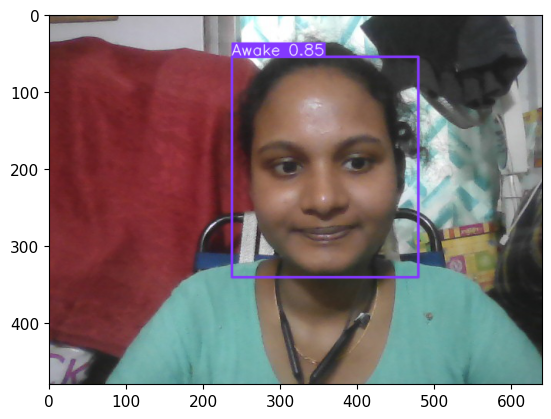

In [23]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

# Test for detecting Sleepy 

In [24]:
img="C://Users//Lenovo//Desktop//data_img//images//drowsy.ee2dc3de-6407-11ee-9658-f89e94306569.jpg"

In [25]:
results=model(img)
results.print()

image 1/1: 480x640 1 Sleepy
Speed: 10.7ms pre-process, 128.5ms inference, 5.5ms NMS per image at shape (1, 3, 480, 640)


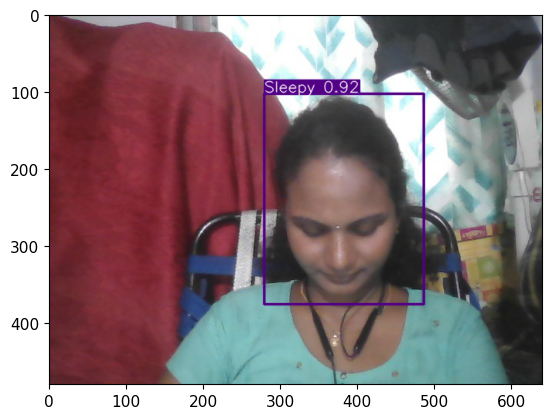

In [26]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()